In [7]:
import torch
import torch.nn as nn
import torch.utils.data
import torch.utils.data as data_utils
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from tqdm import tqdm
import timeit

### CRISPR_gene_effect.csv

In [8]:
df = pd.read_csv('data/CRISPR_gene_effect.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Columns: 17387 entries, DepMap_ID to ZZZ3 (26009)
dtypes: float64(17386), object(1)
memory usage: 144.1+ MB


In [ ]:
df.iloc[:,1:].fillna(0).to_numpy().min()

Genes:17386  
Cell Lines:1086  
Primary Diseases:31  
Lineages:28  

In [ ]:
gene_effect = df #.set_index("DepMap_ID")

In [ ]:
gene_effect.iloc[:5,:10]

In [ ]:
gene_mean = gene_effect.mean().to_numpy()

In [ ]:
fig = plt.figure(figsize=(20,4))
plt.imshow(gene_effect.iloc[:,1:].fillna(0).to_numpy(), cmap="YlGnBu",interpolation='nearest')
plt.xlabel("Genes")
plt.ylabel("Cell lines")
plt.title("Gene effect")
plt.show()

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.hist(gene_mean, rwidth=0.9, bins=20)
plt.xlabel('Average gene effect score')
plt.ylabel('Number of genes')
plt.title("Histogram of the global gene effect")
plt.show()

### CCLE_expression.csv

In [ ]:
df = pd.read_csv('data/CCLE_expression.csv')
df.info()

In [ ]:
df[:5]

In [ ]:
print(f"Gene expression goes from {df.iloc[:,1:].fillna(0).to_numpy().min():.2f} "
      f"to {df.iloc[:,1:].fillna(0).to_numpy().max():.2f}.")

In [ ]:
gene_expression = df.rename(columns={"Unnamed: 0":"DepMap"}).set_index("DepMap")

In [ ]:
gene_expression.iloc[:5,:10]

In [ ]:
gene_expr_mean = gene_expression.mean().to_numpy()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.imshow(-gene_expression.iloc[:,1:].fillna(0).to_numpy(), cmap="YlGnBu",interpolation='nearest')
plt.xlabel("Genes")
plt.ylabel("Cell lines")
plt.title("Gene expression")
plt.show()

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.hist(gene_expr_mean, rwidth=0.9, bins=20)
plt.xlabel('Average gene expression score')
plt.ylabel('Number of genes')
plt.title("Histogram of the global gene expression")
plt.show()

### CRISPR_gene_dependency.csv

In [ ]:
df = pd.read_csv('data/CRISPR_gene_dependency.csv')
df.info()

In [ ]:
gene_dependency = df

In [ ]:
gene_dependency[:5]

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.imshow(-gene_dependency.iloc[:,1:].fillna(0).to_numpy(), cmap="YlGnBu",interpolation='nearest')
plt.xlabel("Genes")
plt.ylabel("Cell lines")
plt.title("Gene dependency")
plt.show()

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.hist(gene_dependency.mean().to_numpy(), rwidth=0.9, bins=20)
plt.xlabel('Average gene effect score')
plt.ylabel('Number of genes')
plt.title("Histogram of the global gene effect")
plt.show()

### common_essentials.csv

In [ ]:
df = pd.read_csv('data/common_essentials.csv')
df.info()

In [ ]:
common_essentials = df.values[:,0].tolist()

In [ ]:
common_essentials[:10]

In [ ]:
print(f"{len(set(gene_effect.columns[1:]).intersection(common_essentials))} " 
      f"essential genes out of "
      f"{len(common_essentials)} are in CRISPR dataset")

### nonessentials.csv

In [ ]:
df = pd.read_csv('data/nonessentials.csv')
df.info()

In [ ]:
nonessentials = df.values[:,0].tolist()

In [ ]:
nonessentials[:10]

In [ ]:
print(f"{len(set(gene_effect.columns[1:]).intersection(nonessentials))} " 
      f"non-essential genes out of "
      f"{len(nonessentials)} are in CRISPR dataset")

In [ ]:
len(gene_effect.columns[1:]) - 1237 - 632

### Achilles_gene_effect.csv

In [ ]:
df = pd.read_csv('data/Achilles_gene_effect.csv')
df.info()

In [ ]:
ach_gene_effect = df

In [ ]:
gene_effect[:5]

In [ ]:
ach_gene_effect[:10]

In [ ]:
plt.hist(gene_effect.mean().to_numpy(), rwidth=0.9, bins=20);plt.show()

In [ ]:
plt.hist(ach_gene_effect.mean().to_numpy(), rwidth=0.9, bins=20);plt.show()

### sample_info.csv

In [ ]:
df = pd.read_csv('data/sample_info.csv')
df.info()

In [ ]:
df.columns

In [ ]:
cell_lines_info = df[['DepMap_ID', 'sample_collection_site', 'lineage', 'primary_disease']]

In [ ]:
cell_lines_info.groupby('lineage').count()

In [ ]:
cell_lines_info.groupby('primary_disease')['lineage'].apply(lambda x: len(set(x)))

In [ ]:
cell_lines_info.groupby('lineage').count().info()

**Retrieve Data**

In [9]:
df = pd.read_csv('data/CRISPR_gene_effect.csv')
gene_effect = df.rename(columns={"DepMap_ID":"DepMap"}).set_index("DepMap")

gene_effect.head(5)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
DepMap,,,,,,,,,,,,,,,,,,,,,
ACH-000001,-0.134808,0.059764,-0.008665,-0.003572,-0.106211,-0.008257,0.018711,-0.291985,0.010921,0.064932,...,-0.037619,-0.116524,-0.029331,0.105940,0.147605,-0.119822,0.063387,0.160857,0.058648,-0.316792
ACH-000004,0.081853,-0.056401,-0.106738,-0.014499,0.078209,-0.137562,0.168657,-0.198560,0.133372,0.151300,...,-0.030901,-0.262220,0.136406,0.031327,0.093763,-0.079692,-0.173709,0.153632,0.175627,-0.040869
ACH-000005,-0.094196,-0.014598,0.100426,0.169103,0.032363,-0.148050,0.168931,-0.244777,-0.086871,-0.036037,...,0.039434,-0.336925,-0.095528,-0.035541,-0.035612,-0.040183,-0.165464,0.077343,0.019387,-0.085687
ACH-000007,-0.011544,-0.123189,0.080692,0.061046,-0.013454,-0.016922,-0.029474,-0.206516,-0.063998,0.139288,...,-0.229303,-0.463191,0.061641,0.190301,0.119388,-0.036695,-0.182449,-0.146936,-0.189451,-0.281167
ACH-000009,-0.050782,-0.037466,0.068885,0.090375,0.012634,-0.079339,-0.017808,-0.183192,0.006227,-0.001700,...,-0.157219,-0.318765,0.015761,0.196949,-0.045874,-0.186805,-0.275629,-0.001227,-0.049140,-0.240582


In [10]:
df = pd.read_csv('data/CCLE_expression.csv')
gene_expression = df.rename(columns={"Unnamed: 0":"DepMap"}).set_index("DepMap")


gene_expression.head(5)

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
DepMap,,,,,,,,,,,,,,,,,,,,,
ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537,0.028569,1.226509,3.042644,6.499686,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000
ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000


In [11]:
gene_expression = gene_expression.sort_values(by = 'DepMap').reindex(sorted(gene_expression.columns), axis = 1)
gene_effect = gene_effect.sort_values(by = 'DepMap').reindex(sorted(gene_effect.columns), axis = 1)

In [12]:
cols1 = gene_expression.columns
cols2 = gene_effect.columns

def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

cols = sorted(intersection(cols1, cols2))
gene_expression = gene_expression[cols]
gene_effect = gene_effect[cols]

In [13]:
rows1 = list(gene_expression.index)
rows2 = list(gene_effect.index)

rows = intersection(rows1, rows2)
gene_expression = gene_expression.reindex(index = sorted(rows))
gene_effect = gene_effect.reindex(index = sorted(rows))

In [14]:
gene_expression.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
DepMap,,,,,,,,,,,,,,,,,,,,,
ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,0.790772,...,5.080658,6.675957,0.978196,1.914565,4.700994,3.282440,2.797013,6.821455,3.010780,4.381975
ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,0.000000,...,4.276497,6.098664,0.765535,1.622930,3.619413,0.014355,2.032101,7.002252,3.444932,4.910733
ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,0.000000,...,5.628482,6.785289,0.807355,1.773996,3.763412,0.014355,2.761285,6.826421,3.524816,5.592457
ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,3.547203,...,3.842979,6.125775,0.526069,1.761285,3.872829,0.014355,1.989139,6.332708,3.673556,3.469886
ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,1.985500,...,4.761817,7.914086,0.815575,2.176323,3.773996,1.356144,2.956057,7.853185,3.442280,3.351911


In [15]:
gene_effect.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
DepMap,,,,,,,,,,,,,,,,,,,,,
ACH-000001,-0.134808,0.059764,-0.008665,-0.003572,-0.106211,-0.008257,0.018711,-0.291985,0.010921,0.064932,...,-0.037619,-0.116524,-0.029331,0.105940,0.147605,-0.119822,0.063387,0.160857,0.058648,-0.316792
ACH-000004,0.081853,-0.056401,-0.106738,-0.014499,0.078209,-0.137562,0.168657,-0.198560,0.133372,0.151300,...,-0.030901,-0.262220,0.136406,0.031327,0.093763,-0.079692,-0.173709,0.153632,0.175627,-0.040869
ACH-000005,-0.094196,-0.014598,0.100426,0.169103,0.032363,-0.148050,0.168931,-0.244777,-0.086871,-0.036037,...,0.039434,-0.336925,-0.095528,-0.035541,-0.035612,-0.040183,-0.165464,0.077343,0.019387,-0.085687
ACH-000007,-0.011544,-0.123189,0.080692,0.061046,-0.013454,-0.016922,-0.029474,-0.206516,-0.063998,0.139288,...,-0.229303,-0.463191,0.061641,0.190301,0.119388,-0.036695,-0.182449,-0.146936,-0.189451,-0.281167
ACH-000009,-0.050782,-0.037466,0.068885,0.090375,0.012634,-0.079339,-0.017808,-0.183192,0.006227,-0.001700,...,-0.157219,-0.318765,0.015761,0.196949,-0.045874,-0.186805,-0.275629,-0.001227,-0.049140,-0.240582


### ML

In [69]:
def run_one_epoch(train_flag, dataloader, model, optimizer, device="cuda"):

    torch.set_grad_enabled(train_flag)
    model.train() if train_flag else model.eval() 

    losses = []
    accuracies = []

    for (x,y) in dataloader: # collection of tuples with iterator

        (x, y) = ( x.to(device), y.to(device) ) # transfer data to GPU

        output = model(x) # forward pass
        output = output.squeeze() # remove spurious channel dimension
        #loss = F.binary_cross_entropy_with_logits( output, y ) # numerically stable
        loss = F.mse_loss(output.float(), y.float())

        if train_flag: 
            loss.backward() # back propagation
            optimizer.step()
            optimizer.zero_grad()

        losses.append(loss.detach().cpu().numpy())
        
    return np.mean(losses)

In [70]:
# TODO make wrapper function. 

def train_model(model, X_train, y_train, X_val, y_val, optimizer, device="cpu", batch_size = 5, 
                epochs=20, patience=10, verbose=True):
    """
    Train a 1D CNN model and record accuracy metrics.
    """

    # Make new Dataset and DataLoader objects for both training and validation data.
    train_dataset = data_utils.TensorDataset(X_train, y_train)
    train_dataloader = data_utils.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = data_utils.TensorDataset(X_val, y_val)
    val_dataloader = data_utils.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    # Run the training loop with early stopping. 
    train_losses = []
    val_losses = []
    patience_counter = patience
    best_val_loss = np.inf
    check_point_filename = 'model_checkpoint.pt' # to save the best model fit to date
    for epoch in tqdm(range(epochs)):
        start_time = timeit.default_timer()
        train_loss = run_one_epoch(True, train_dataloader, model, optimizer, device)
        val_loss = run_one_epoch(False, val_dataloader, model, optimizer, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        if val_loss < best_val_loss: 
            torch.save(model.state_dict(), check_point_filename)
            best_val_loss = val_loss
            patience_counter = patience
        else: 
            patience_counter -= 1
            if patience_counter <= 0: 
                model.load_state_dict(torch.load(check_point_filename)) # recover the best model so far
                break
        elapsed = float(timeit.default_timer() - start_time)
        if verbose:
            print("Epoch %i | took %.2fs | Train loss: %.4f | Val loss: %.4f | Patience left: %i" % 
              (epoch+1, elapsed, train_loss, val_loss, patience_counter ))

    # Return the fitted model (not strictly necessary since this happens "in place"), train and validation accuracies.
    return model, train_losses, val_losses


In [43]:
class Net(torch.nn.Module):
    def __init__(self, input_size, output_size=None):
        super(Net, self).__init__()
        if output_size is None:
            output_size = input_size
        self.layer = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.layer(x.float())#type('TensorDloat'))      
        return x

In [44]:
device="cpu"

In [45]:
nb_genes = 5_000

In [46]:
model = Net(nb_genes).to(device)

In [48]:
X = gene_expression.dropna().iloc[:500,1:nb_genes + 1].to_numpy().astype('double')

In [49]:
y = gene_effect.dropna().iloc[:500,1:nb_genes + 1].to_numpy().astype('double')

In [102]:
def set_split(X, y, proportion):
    index = np.arange(len(X))
    np.random.shuffle(index)
    sum_p = sum(proportion)
    proportion = [p / sum_p for p in proportion]
    prop=0
    N = len(index)
    X_splits = []
    y_splits = []
    for i in range(len(proportion)):
        start_index = round( N*prop )
        end_index = round( N*(prop+proportion[i]) )
        
        set_index = index[start_index: end_index]
        X_splits.append( X[set_index] )
        y_splits.append( y[set_index] )
        
        prop += proportion[i]
    
    return *X_splits, *y_splits

In [107]:
X_train, X_val, X_test, y_train, y_val,y_test = set_split(X, y, [0.7,0.2,0.1])

In [108]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(350, 5000)
(350, 5000)
(100, 5000)
(100, 5000)
(50, 5000)
(50, 5000)


In [111]:
X_train = torch.tensor(X_train, device='cpu')
y_train = torch.tensor(y_train, device='cpu')
X_val = torch.tensor(X_val, device='cpu')
y_val = torch.tensor(y_val, device='cpu')
X_test = torch.tensor(X_test, device='cpu')
y_test = torch.tensor(y_test, device='cpu')

In [106]:
X_train.size()

torch.Size([350, 5000])

In [109]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [112]:
trained_model, train_losses, val_losses = train_model(model, X_train, y_train, X_val, y_val, 
                                                  optimizer,
                                                  device,
                                                 epochs=20,verbose=False)

100%|████████████████████████████████████████████████████████████████████████████| 20/20 [03:12<00:00,  9.61s/it]


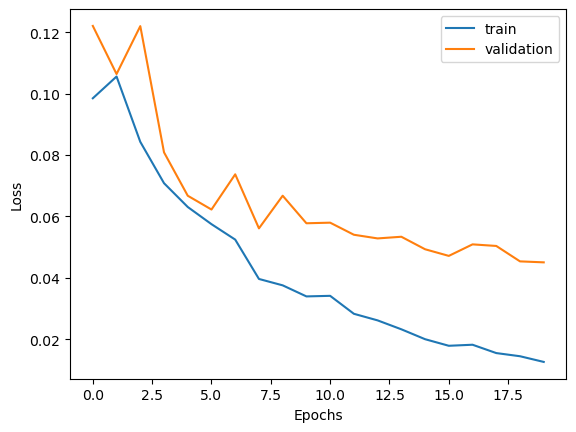

In [113]:
plt.plot(train_losses, label = "train")
plt.plot(val_losses, label = "validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()